### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### UNDERSTANDING the Data

#### Loading the data

In [3]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

print(f"Train Shpae: {train.shape}")
print(f"Test Shape: {test.shape}")
print(f"{train.head()}")

Train Shpae: (8693, 14)
Test Shape: (4277, 13)
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2     

#### Checking types and missing values

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [91]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_Spendings
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,1440.866329
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2803.045694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,716.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1441.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000


In [33]:
print(train['Transported'].value_counts())
print(train["Transported"].value_counts(normalize=True))

Transported
True     4378
False    4315
Name: count, dtype: int64
Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64


Almost identical number of true/false- This is the baseline! Any model worse than 50% is useless.

In [28]:
missing = train.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
dtype: int64


Looks like there are missing values in almost all of the coloums- We would have to handle it later

### Exploring the Data

##### Age

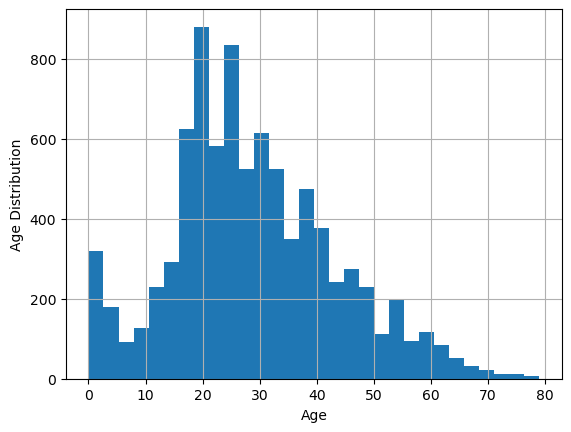

In [ ]:
train["Age"].hist(bins=30)
plt.xlabel("Age")
plt.ylabel("Age Distribution")
plt.show()

Looks like it's almost a normal disturbition with a little bit of outliers

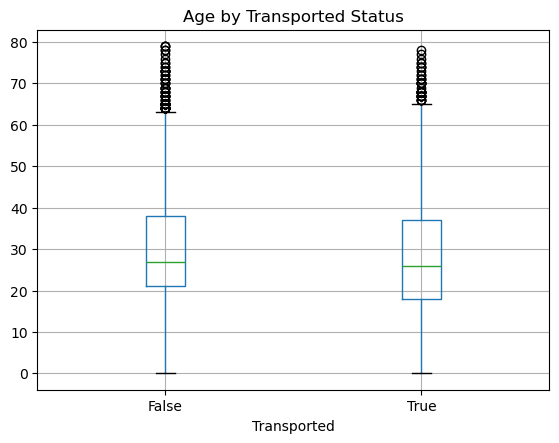

In [38]:
train.boxplot(column="Age", by="Transported")
plt.suptitle('')
plt.title("Age by Transported Status")
plt.show()

In [35]:
train[["Age", "Transported"]].corr()

,Age,Transported
Age,1.000000,-0.075026
Transported,-0.075026,1.000000


Age_Group
Child          0.668790
Teen           0.537299
Young_Adult    0.468190
Adult          0.479432
Senior         0.484396
Name: Transported, dtype: float64


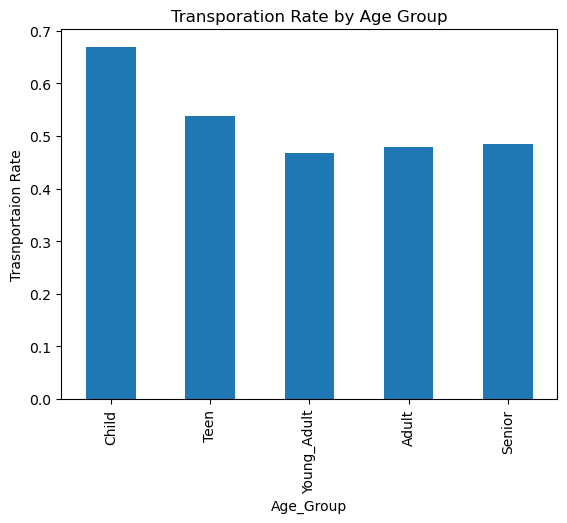

In [75]:
train["Age_Group"] = pd.cut(train["Age"],
                            bins = [0, 12, 18, 30, 50, 100],
                            labels=["Child", "Teen", "Young_Adult", "Adult", "Senior"])
age_transport = train.groupby("Age_Group", observed=True)["Transported"].mean()
print(age_transport)
age_transport.plot(kind="bar")
plt.ylabel("Trasnportaion Rate")
plt.title("Transporation Rate by Age Group")
plt.show()

##### Numerical Cols

In [89]:
spending_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
train["Total_Spendings"] = train[spending_cols].sum(axis=1)

correlations = train[spending_cols + ["Total_Spendings"] + ["Transported"]].corr()["Transported"].drop(["Transported"])
print(correlations.sort_values(ascending=False))

FoodCourt          0.046566
ShoppingMall       0.010141
Total_Spendings   -0.199514
VRDeck            -0.207075
Spa               -0.221131
RoomService       -0.244611
Name: Transported, dtype: float64


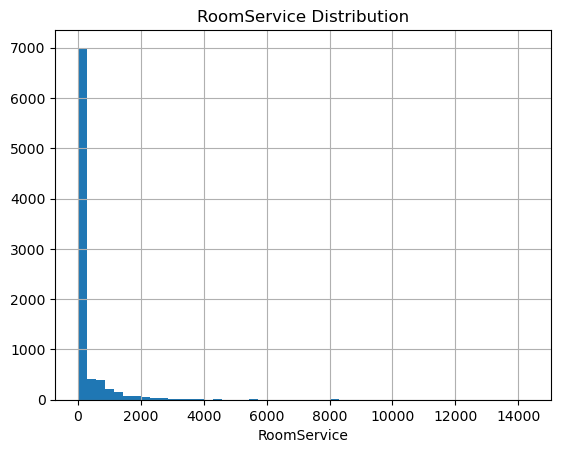

In [90]:
train["RoomService"].hist(bins=50)
plt.xlabel("RoomService")
plt.title("RoomService Distribution")
plt.show()

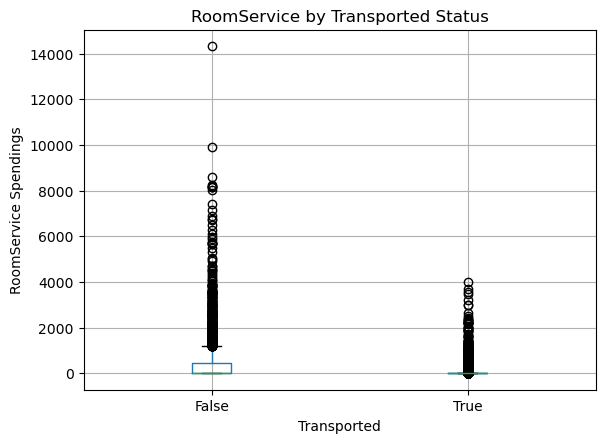

In [93]:
train.boxplot(column="RoomService", by="Transported")
plt.suptitle("")
plt.title("RoomService by Transported Status")
plt.ylabel("RoomService Spendings")
plt.show()

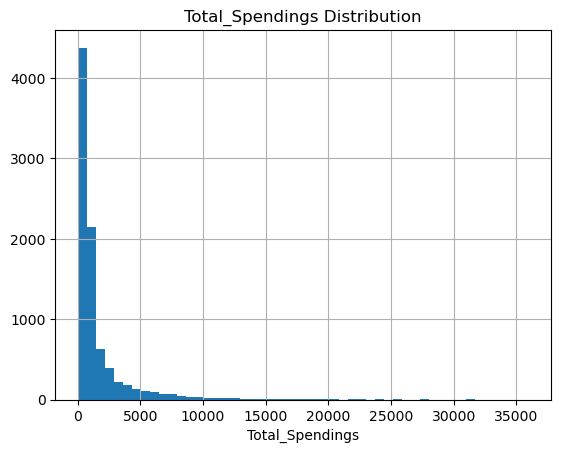

In [96]:
train["Total_Spendings"].hist(bins=50)
plt.xlabel("Total_Spendings")
plt.title("Total_Spendings Distribution")
plt.show()

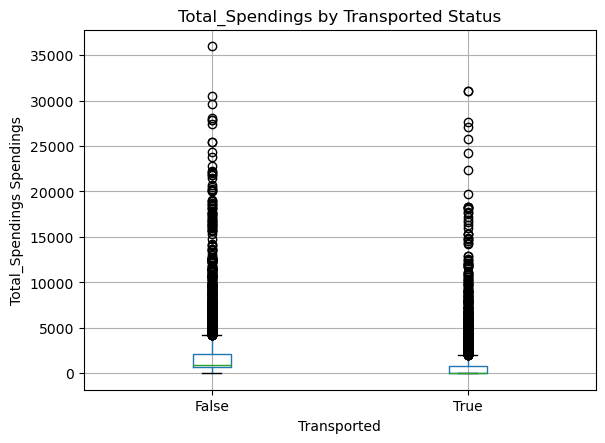

In [97]:
train.boxplot(column="Total_Spendings", by="Transported")
plt.suptitle("")
plt.title("Total_Spendings by Transported Status")
plt.ylabel("Total_Spendings Spendings")
plt.show()

In [110]:
train["Is_Spender"] = train["Total_Spendings"] > 0
train.groupby("Is_Spender")["Transported"].mean()

Is_Spender
False    0.786477
True     0.298611
Name: Transported, dtype: float64

Is_Spender   -0.481628
Name: Transported, dtype: float64


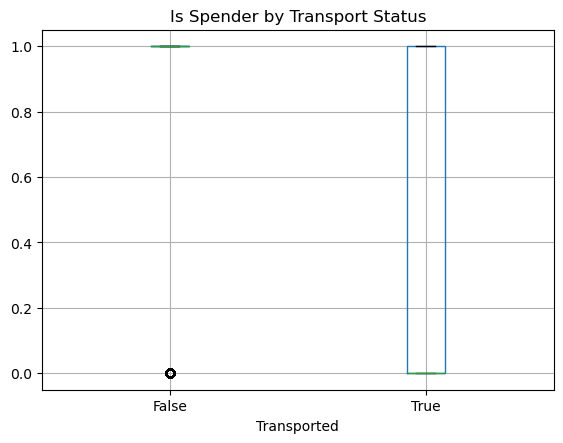

In [125]:
cor = train[["Is_Spender", "Transported"]].corr()["Transported"].drop("Transported")
print(cor)
train.boxplot(column="Is_Spender", by="Transported")
plt.suptitle("")
plt.title("Is Spender by Transport Status")
plt.show()

We see a big corralation between if a person spent money to him being transported- let's check maybe if someone hasn't spent any money he could be in cyrosleep

In [128]:
print(pd.crosstab(train["Is_Spender"], train["CryoSleep"], margins=True))
print("\nCyroSleep transport rate:")
print(train.groupby("CryoSleep")["Transported"].mean())

CryoSleep   False  True   All
Is_Spender                   
False         518  3037  3555
True         4921     0  4921
All          5439  3037  8476

CyroSleep transport rate:
CryoSleep
False    0.328921
True     0.817583
Name: Transported, dtype: float64


In [135]:
awake_non_spenders = train[(train["Is_Spender"] == False) & (train["CryoSleep"] == False)]
print(f"Count: {len(awake_non_spenders)}")
print(f"Transport Rate: {awake_non_spenders["Transported"].mean():.5}")

frozen_non_spenders = train[(train["Is_Spender"] == False) & (train["CryoSleep"] == True)]
print(f"\nCount: {len(frozen_non_spenders)}")
print(f"Transport Rate: {frozen_non_spenders["Transported"].mean():.5}")

Count: 518
Transport Rate: 0.61583

Count: 3037
Transport Rate: 0.81758


##### Categorical Features

In [153]:
categorical_cols = ["HomePlanet", "Destination", "VIP"]
print(train[categorical_cols].nunique())
print(train[categorical_cols].isna().sum())

HomePlanet     3
Destination    3
VIP            2
dtype: int64
HomePlanet     201
Destination    182
VIP            203
dtype: int64



Transport Rate for HomePlanet
Europa    0.658846
Mars      0.523024
Earth     0.423946
Name: Transported, dtype: float64


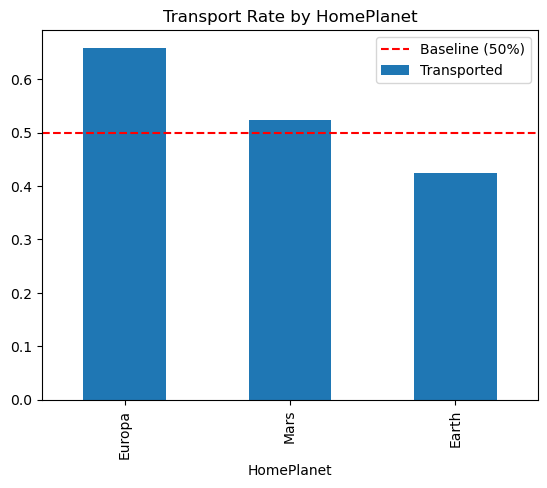


Transport Rate for Destination
55 Cancri e      0.610000
PSO J318.5-22    0.503769
TRAPPIST-1e      0.471175
Name: Transported, dtype: float64


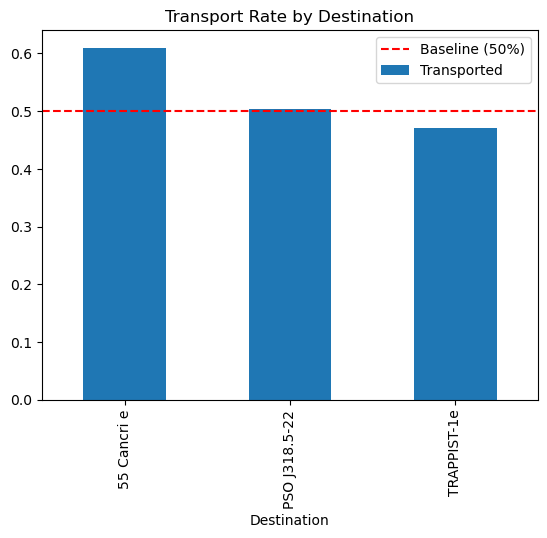


Transport Rate for VIP
False    0.506332
True     0.381910
Name: Transported, dtype: float64


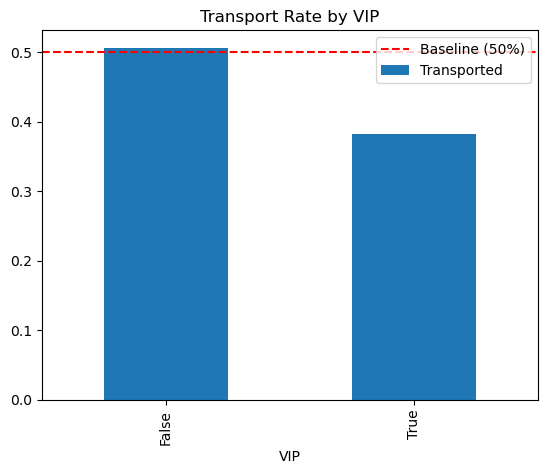

In [154]:
for col in categorical_cols:
    transport_rate = train.groupby(col)['Transported'].mean().sort_values(ascending=False)
    print(f"\nTransport Rate for {transport_rate}")
    transport_rate.plot(kind="bar")
    plt.title(f"Transport Rate by {col}")
    plt.axhline(y=0.5, color='r', linestyle="--", label="Baseline (50%)")
    plt.legend()
    plt.show()

##### Structured Features

Check Cabin details

In [159]:
train["Cabin_Deck"] = train["Cabin"].str.split("/").str[0]
train["Cabin_Num"] = train["Cabin"].str.split("/").str[1]
train["Cabin_Side"] = train["Cabin"].str.split("/").str[2]
print(train[["Cabin", "Cabin_Deck", "Cabin_Num", "Cabin_Side"]].head(10))

   Cabin Cabin_Deck Cabin_Num Cabin_Side
0  B/0/P          B         0          P
1  F/0/S          F         0          S
2  A/0/S          A         0          S
3  A/0/S          A         0          S
4  F/1/S          F         1          S
5  F/0/P          F         0          P
6  F/2/S          F         2          S
7  G/0/S          G         0          S
8  F/3/S          F         3          S
9  B/1/P          B         1          P


In [163]:
print(f"Unique Decks: {train["Cabin_Deck"].nunique()}")
print(f"\nUnique Decks: {train["Cabin_Deck"].value_counts()}")
print(f"\nUnique Numbers: {train["Cabin_Num"].nunique()}")
print(f"\nUnique Sides: {train["Cabin_Side"].nunique()}")
print(f"\nUnique Sides: {train["Cabin_Side"].value_counts()}")

Unique Decks: 8

Unique Decks: Cabin_Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

Unique Numbers: 1817

Unique Sides: 2

Unique Sides: Cabin_Side
S    4288
P    4206
Name: count, dtype: int64


Transport Rate by Cabin Deck
Cabin_Deck
B    0.734275
C    0.680054
G    0.516217
A    0.496094
F    0.439871
D    0.433054
E    0.357306
T    0.200000
Name: Transported, dtype: float64


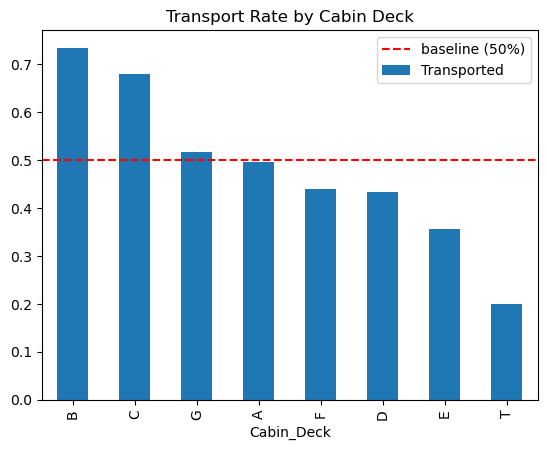

In [168]:
print("Transport Rate by Cabin Deck")
deck_transport = train.groupby("Cabin_Deck")["Transported"].mean().sort_values(ascending=False)
print(deck_transport)
print("=" * 20)
deck_transport.plot(kind="bar")
plt.title("Transport Rate by Cabin Deck")
plt.axhline(y=0.5, color='r', linestyle='--', label="baseline (50%)")
plt.legend()
plt.show()

Transport Rate by Cabin Side
Cabin_Side
S    0.555037
P    0.451260
Name: Transported, dtype: float64


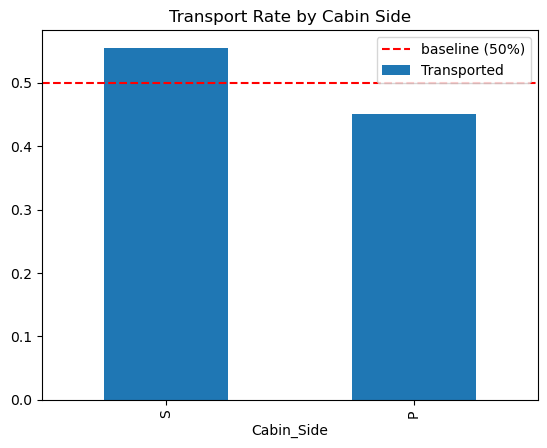

In [169]:
print("Transport Rate by Cabin Side")
side_transport = train.groupby("Cabin_Side")["Transported"].mean().sort_values(ascending=False)
print(side_transport)
print("=" * 20)
side_transport.plot(kind="bar")
plt.title("Transport Rate by Cabin Side")
plt.axhline(y=0.5, color='r', linestyle='--', label="baseline (50%)")
plt.legend()
plt.show()

In [173]:
train.drop(["Cabin", "Cabin_Num"], axis=1, inplace=True)

Check Passenger group

In [176]:
train["Group"] = train["PassengerId"].str.split("_").str[0]
train["Group_Size"] = train.groupby("Group")["PassengerId"].transform("count")
print(train[["PassengerId", "Group", "Group_Size"]])
print(train["Group_Size"].value_counts().sort_index())

     PassengerId Group  Group_Size
0        0001_01  0001           1
1        0002_01  0002           1
2        0003_01  0003           2
3        0003_02  0003           2
4        0004_01  0004           1
...          ...   ...         ...
8688     9276_01  9276           1
8689     9278_01  9278           1
8690     9279_01  9279           1
8691     9280_01  9280           2
8692     9280_02  9280           2

[8693 rows x 3 columns]
Group_Size
1    4805
2    1682
3    1020
4     412
5     265
6     174
7     231
8     104
Name: count, dtype: int64


Transport Rate by Group Size
Transport Rate by Group Size: Group_Size_Bucket
Small_Group    0.606844
Big_Group      0.555556
Pair           0.538050
Solo           0.452445
Name: Transported, dtype: float64


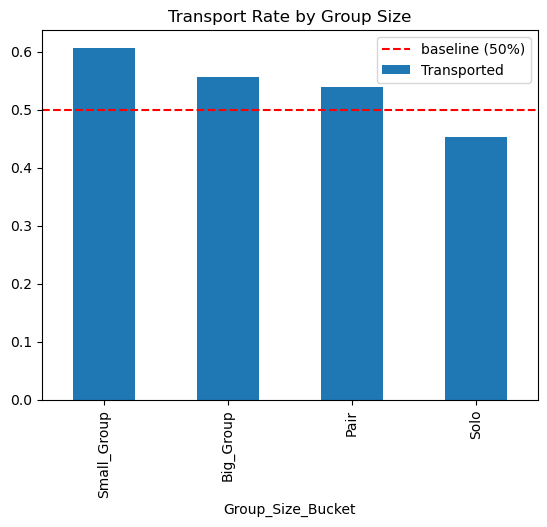

In [179]:
train["Group_Size_Bucket"] = pd.cut(train["Group_Size"],
                                    bins=[0, 1, 2, 4, 10],
                                    labels=['Solo', 'Pair', 'Small_Group', 'Big_Group'])
print("Transport Rate by Group Size")
group_transport = train.groupby("Group_Size_Bucket", observed=True)["Transported"].mean().sort_values(ascending=False)
print(f"Transport Rate by Group Size: {group_transport}")

group_transport.plot(kind="bar")
plt.title("Transport Rate by Group Size")
plt.axhline(y=0.5, color='r', linestyle='--', label="baseline (50%)")
plt.legend()
plt.show()